In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import scipy
from sklearn.model_selection import train_test_split
plotly.offline.init_notebook_mode(connected=True)

In [2]:
#reading the dataset
churn_data=pd.read_csv('churn_prediction.csv')
churn_data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [3]:
#variable identification
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  float64
 11  previous_month_end_balance      28382 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
#observing the dataset
churn_data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


*It can be seen that in a saving account customer balances are negative which can't be the case.So replacing these columns with zero.*

In [5]:
columns=['current_balance','previous_month_end_balance','average_monthly_balance_prevQ2','current_month_balance','previous_month_balance']
for i in columns:
    churn_data[i] = churn_data[i].apply(lambda x : x if x > 0 else 0)

In [6]:
churn_data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.381755e+03,7.496383e+03,7.496780e+03,7.127608e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451460e+03,7.495539e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259845e+04,4.252922e+04,4.172622e+04,4.457498e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203387e+04,4.243190e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.428690e+03,0.000000e+00,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


# UNIVARIATE ANALYSIS

## Continuous variables

In [7]:
#function to plot histograms for continuous variables
def continuous(feature):
    plt.figure(figsize=(20,5))
    sns.histplot(x=feature,data=churn_data)

Text(0.5, 0, 'Vintage(in days)')

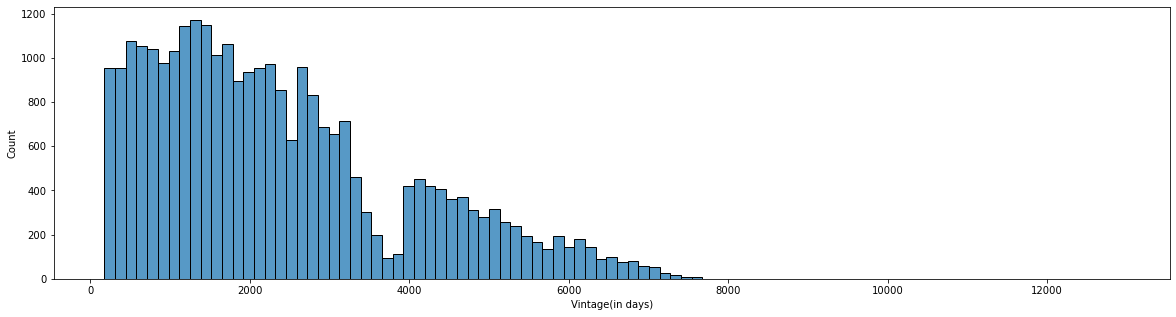

In [8]:
continuous('vintage')
plt.xlabel('Vintage(in days)')

* *Vintage data is showing right skewed distribution.*

* *Most of the customers are associated with the bank less than 2000 days.*

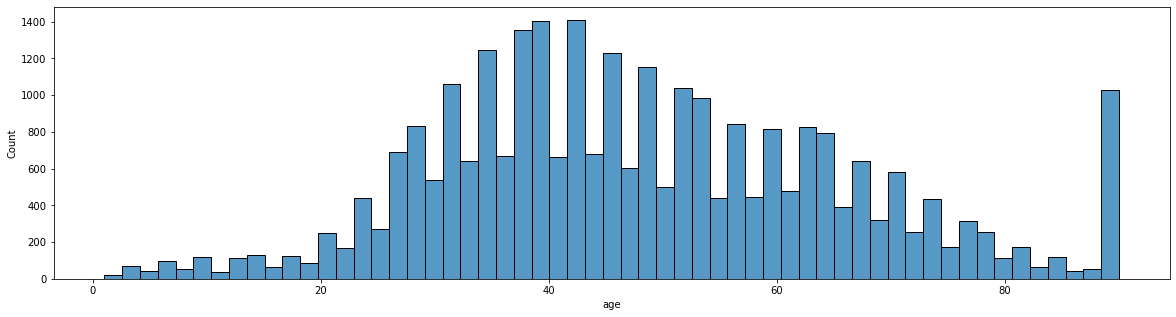

In [9]:
continuous('age')

* *Age is seen to be normally distributed.*
* *Majority of customers are around 40 years of age.*

([<matplotlib.axis.XTick at 0x2231cfbbc70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

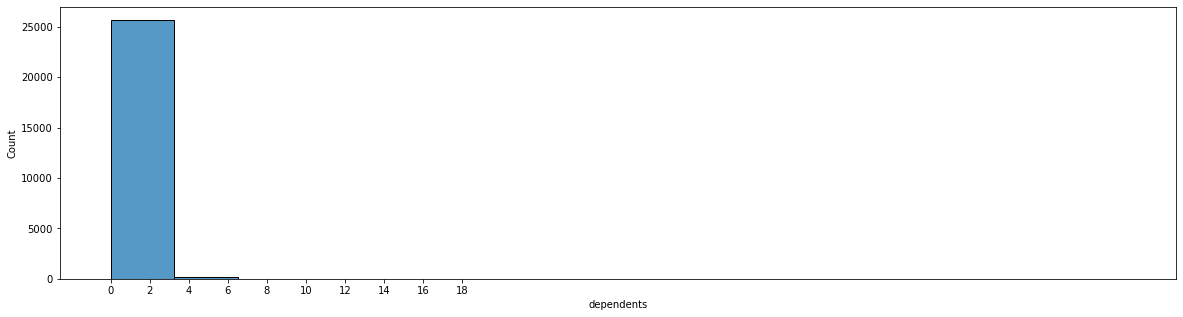

In [10]:
continuous('dependents')
plt.xticks(range(0,20,2))

* *There are mostly 0 -2 dependents for majority of customers.*

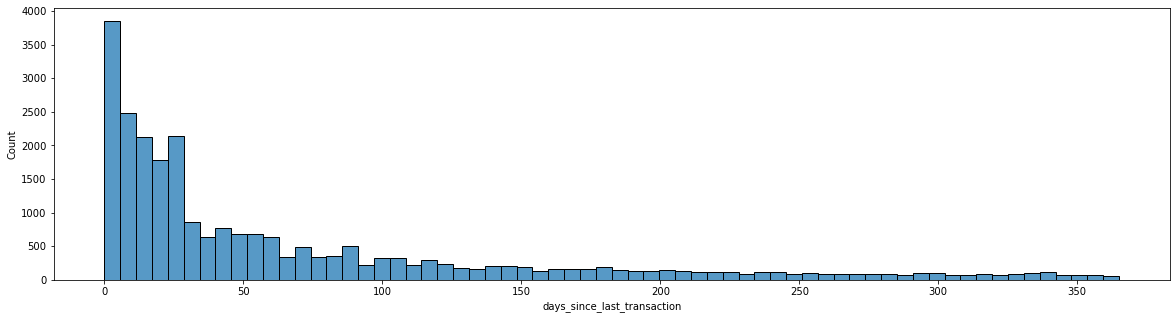

In [11]:
continuous('days_since_last_transaction')

* *days_since_last_transaction has right skewed distribution.*
* *Most of the customers have done last transaction less than 50 days with the bank.*

In [12]:
diff_balance=churn_data['previous_month_end_balance']-churn_data['current_balance']
diff_balance.value_counts(normalize=True)

 0.00         0.224508
 14.29        0.004404
 285.71       0.001621
 14.28        0.001515
 142.86       0.001480
                ...   
 93.80        0.000035
-5940.85      0.000035
 78.12        0.000035
-116917.23    0.000035
 965.76       0.000035
Length: 18877, dtype: float64

* *22.4% the customers have same balance from previous month hence there difference is zero.*

In [13]:
credit_diff=churn_data['previous_month_credit']-churn_data['current_month_credit']
credit_diff.value_counts(normalize=True)

 0.00        0.461419
 1428.57     0.002713
-1428.57     0.002184
-2857.14     0.001762
-714.28      0.001621
               ...   
-6421.43     0.000035
-4285.31     0.000035
 4214.59     0.000035
 2916.29     0.000035
 23271.43    0.000035
Length: 11472, dtype: float64

* *46.14% customers of the bank have not credited any balance from previous month till current month hence there difference is zero.*

In [14]:
debit_diff=churn_data['previous_month_debit']-churn_data['current_month_debit']
debit_diff.value_counts(normalize=True)

 0.00        0.330843
 1428.57     0.003171
-1428.57     0.002889
 142.86      0.002537
-142.86      0.002396
               ...   
 21.43       0.000035
 298.71      0.000035
-122.84      0.000035
-98.29       0.000035
 42809.54    0.000035
Length: 14877, dtype: float64

* *33.08% the customers have not debited any balance from previous month till current month hence there difference is zero.*

## Categorical Variables

In [15]:
#function to return pie chart distribution of categorical variables with filtering of null values
def pie_categorical(feature,label,title):
    feature_without_null=churn_data[churn_data[feature].notnull()]
    fig=px.pie(feature_without_null,feature,labels={feature:label},title=title)
    fig.show()

In [16]:
pie_categorical('gender','Gender','Distribution of Customer Gender')

* *59.4% of the customers are female and 40.6% are male.*

In [17]:
pie_categorical('occupation',"Occupation",'Distribution of Occupation of Customers')

* *Majority of the customers are self_employed(61.7%)  followed by (23.7%) salaried.*

In [18]:
pie_categorical('customer_nw_category','Net Worth Category','Distribution of Net worth category of customers')

* *Most of the customers have medium net worth(51.3%) followed by Low net worth(35.6%).*

In [19]:
pie_categorical('churn','Churn','Disbtribution of Churn rate of customers')

* *81.5% of the customers do not exit from the bank whereas 18.5% will exit. Therefore it can be seen that it is an imbalanced dataset.*

## BIVARIATE ANALYSIS

<AxesSubplot:xlabel='age', ylabel='vintage'>

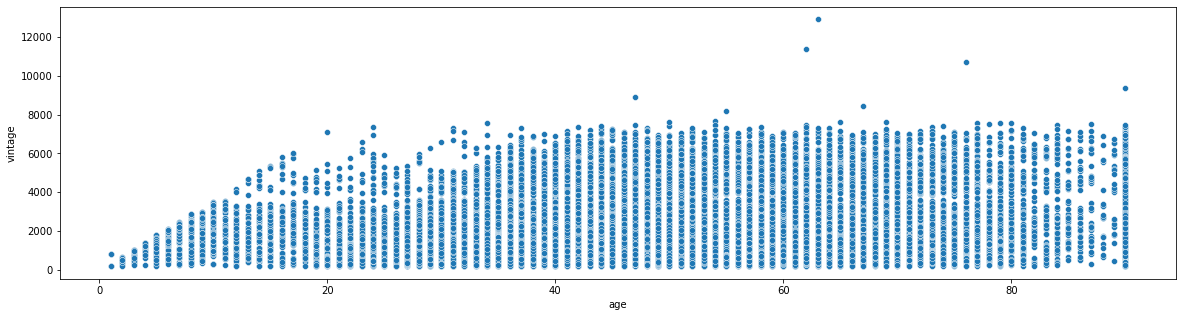

In [20]:
plt.figure(figsize=(20,5))
sns.scatterplot(y='vintage',x='age',data=churn_data,ci=None)

* *Age and Vintage have a linear relationship.*
* *People having more age are generally associated with more number of days with the bank.*

In [21]:
#categorizing age for analysis
churn_data_copy=churn_data.copy(deep=True)
d=churn_data_copy['age']

In [22]:
for i in d:
    if i<18:
        d.replace({i:'Child'},inplace=True)
    elif i>=18 and i<40:
        d.replace({i:'Young'},inplace=True)
    elif i>=40 and i<60:
        d.replace({i:'Middle_Aged'},inplace=True)
    else:
        d.replace({i:'Old'},inplace=True)

In [23]:
pd.crosstab(d,churn_data['churn'])

churn,0,1
age,,
Child,702,104
Middle_Aged,9016,2095
Old,6212,1257
Young,7192,1804


* *Middle_Aged customers have the highest probability of churn whereas child customers have minimum probability.*

<AxesSubplot:xlabel='gender', ylabel='vintage'>

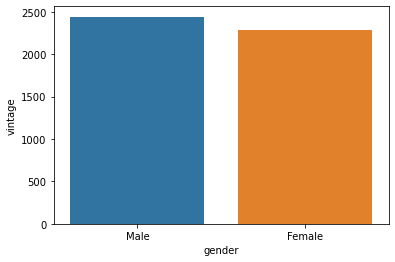

In [24]:
sns.barplot(x='gender',y='vintage',data=churn_data,ci=None)

* *Male has higher number of days with the bank than Female.*

<AxesSubplot:xlabel='churn', ylabel='vintage'>

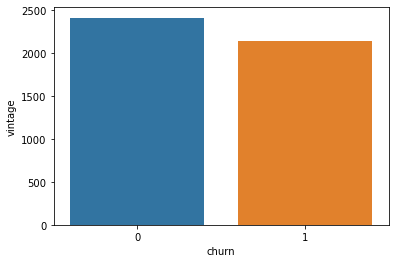

In [25]:
sns.barplot(x='churn',y='vintage',data=churn_data,ci=None)

* *Those customers who don't exit from the bank has higher vintage than those who exit from the bank.*

In [26]:
pd.crosstab(churn_data['churn'], churn_data['customer_nw_category'])

customer_nw_category,1,2,3
churn,,,
0,3001,11953,8168
1,710,2606,1944


* *Those customers having net worth of medium category are likely to churn balance.*

<AxesSubplot:xlabel='customer_nw_category', ylabel='vintage'>

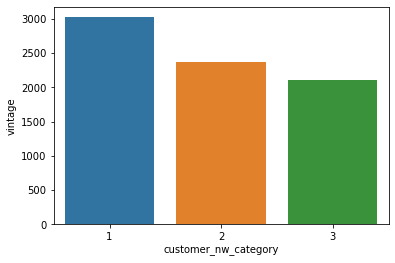

In [27]:
sns.barplot(y='vintage',x='customer_nw_category',data=churn_data,ci=None)

* *Customers with high net worth are generally associated with more days with the bank.*

<AxesSubplot:xlabel='churn', ylabel='dependents'>

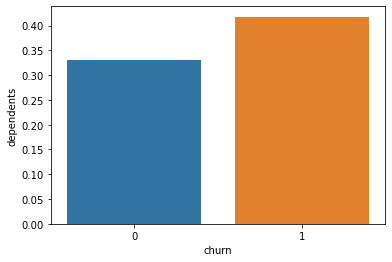

In [28]:
sns.barplot(x='churn',y='dependents',data=churn_data,ci=None)

* *Customers with high number of dependents are likely to churn balances below minimum balance.*

In [29]:
pd.crosstab(churn_data['churn'], churn_data['occupation'])

occupation,company,retired,salaried,self_employed,student
churn,,,,,
0,36,1719,5557,14009,1734
1,4,305,1147,3467,324


* *Self-employed customers have more probability to exit from the bank.*
* *Companies associated with the bank have less probability.*

# HANDLING MISSING VALUES

In [30]:
#finding the missing values
churn_data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [31]:
churn_data.shape

(28382, 21)

In [32]:
X=churn_data.drop('churn',axis=1)
y=churn_data['churn']

In [33]:
#splitting data into train(80%) and test(20%) sets before imputing missing values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=27,stratify=y)

In [34]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((21286, 20), (21286,), (7096, 20), (7096,))

In [35]:
X_train['gender'].value_counts()

Male      12413
Female     8469
Name: gender, dtype: int64

In [36]:
X_train['gender'].mode()

0    Male
dtype: object

In [37]:
#imputing missing values of gender with mode 
X_train['gender'].fillna('Male',inplace=True)
X_test['gender'].fillna('Male',inplace=True)

C:\Users\tusha\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
X_train['dependents'].value_counts()

0.0     16027
2.0      1653
1.0      1071
3.0       524
4.0       132
5.0        27
6.0         6
9.0         1
7.0         1
52.0        1
50.0        1
36.0        1
25.0        1
8.0         1
Name: dependents, dtype: int64

In [39]:
#performing median imputation on missing values as it is not affected by outliers
X_train['dependents'].fillna(X_train['dependents'].median(),inplace=True)
X_test['dependents'].fillna(X_test['dependents'].median(),inplace=True)

In [40]:
X_train['occupation'].value_counts()

self_employed    13139
salaried          5054
retired           1504
student           1494
company             29
Name: occupation, dtype: int64

In [41]:
#mode imputing missing values
X_train['occupation'].fillna('self_employed',inplace=True)
X_test['occupation'].fillna('self_employed',inplace=True)

In [42]:
X_train['city'].value_counts()

1020.0    2615
1096.0    1508
409.0     1000
146.0      968
834.0      836
          ... 
155.0        1
803.0        1
1631.0       1
1128.0       1
36.0         1
Name: city, Length: 1389, dtype: int64

In [43]:
#mean imputing missing values
X_train['city'].fillna(X_train['city'].median(),inplace=True)
X_test['city'].fillna(X_test['city'].median(),inplace=True)

In [44]:
X_train['days_since_last_transaction'].value_counts()

0.0      1245
3.0       615
14.0      489
6.0       470
4.0       465
         ... 
225.0       1
127.0       1
155.0       1
309.0       1
232.0       1
Name: days_since_last_transaction, Length: 356, dtype: int64

In [45]:
#median imputing missing values
X_train['days_since_last_transaction'].fillna(X_train['days_since_last_transaction'].median(),inplace=True)
X_test['days_since_last_transaction'].fillna(X_test['days_since_last_transaction'].median(),inplace=True)

In [46]:
X_train.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

In [47]:
X_test.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
dtype: int64

## OUTLIER DETECTION

In [48]:
X_train.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance'],
      dtype='object')

In [49]:
def outlier_detect(feature,data):
    plt.figure(figsize=(20,5))
    sns.boxplot(x=feature,data=X_train)

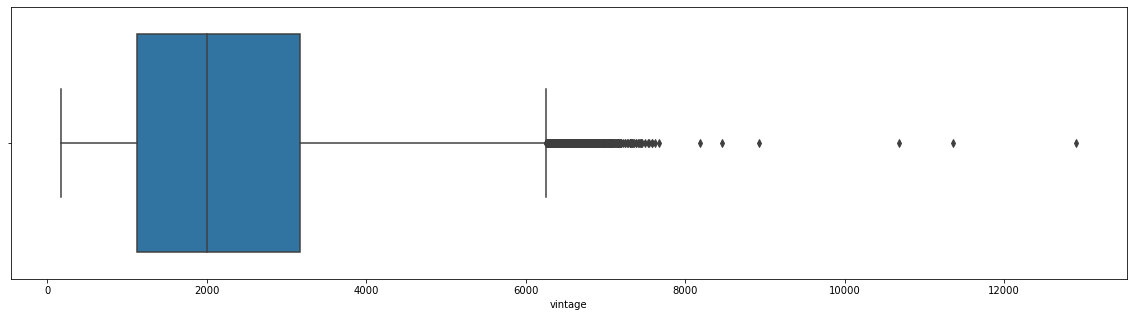

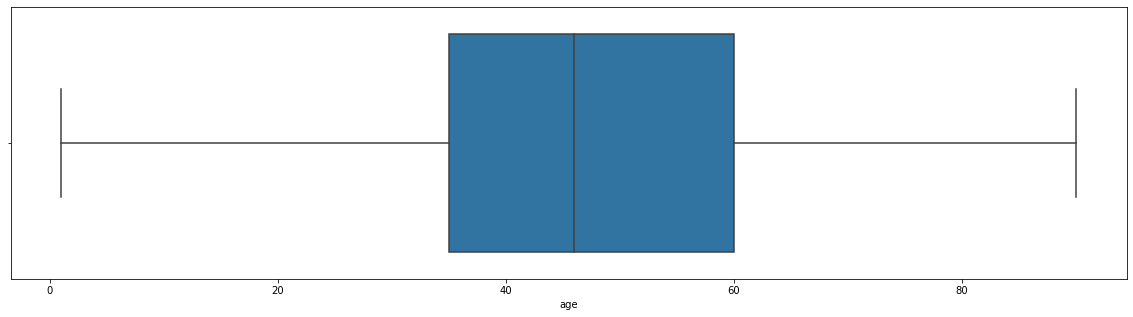

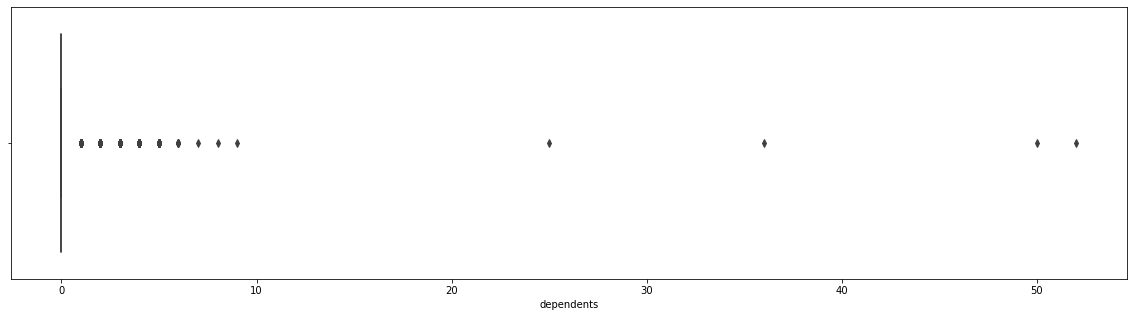

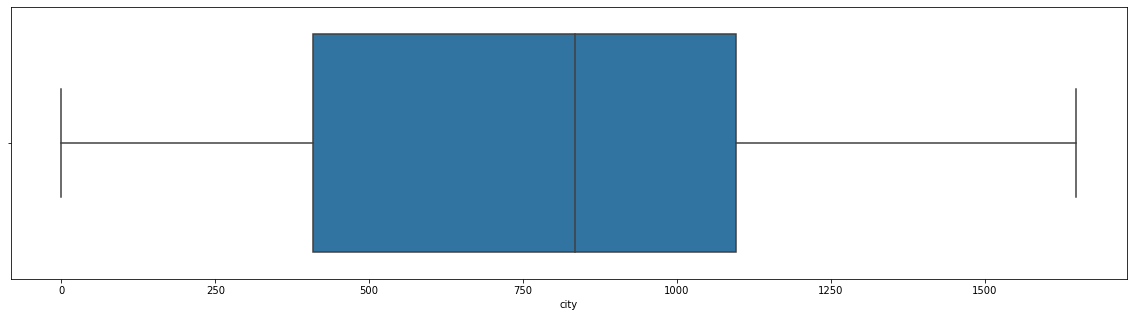

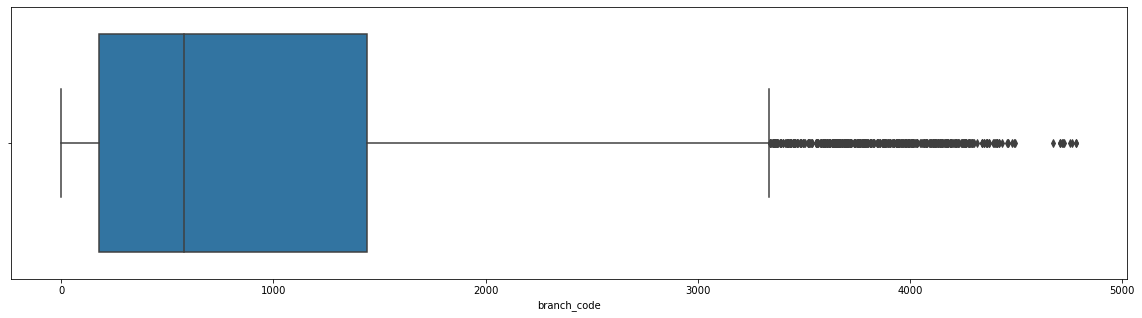

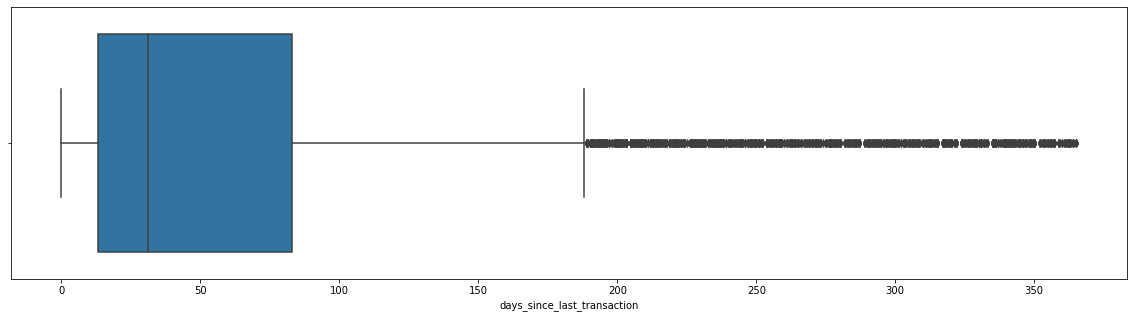

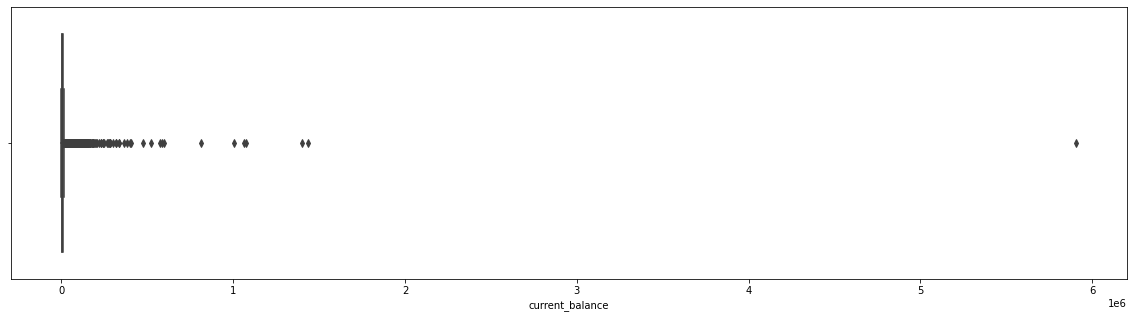

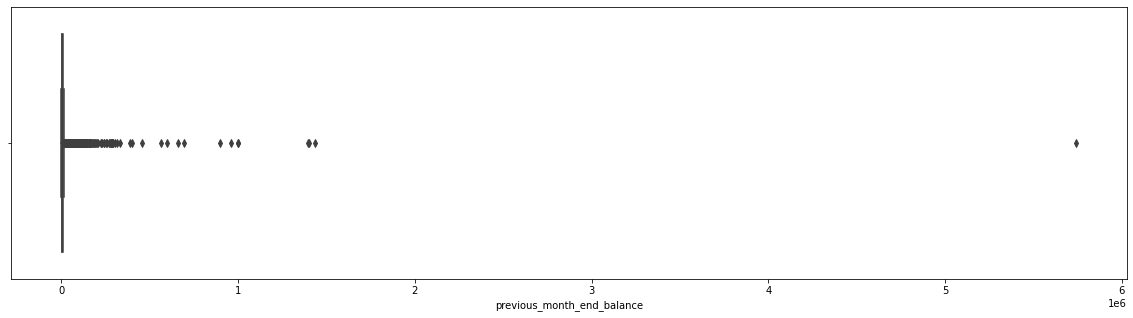

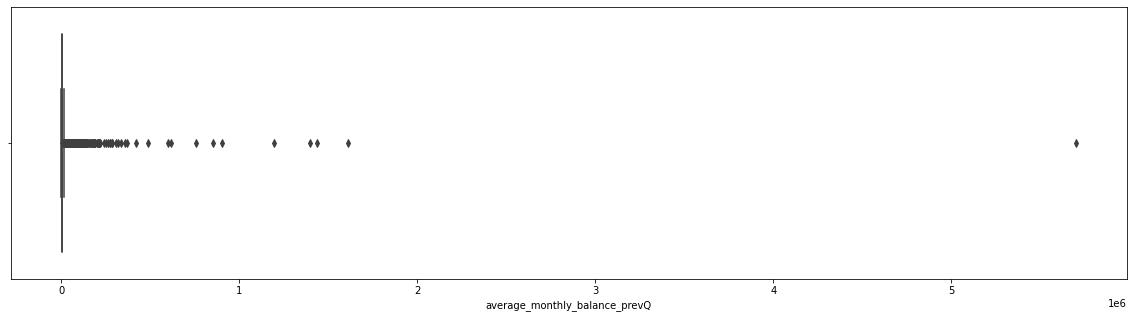

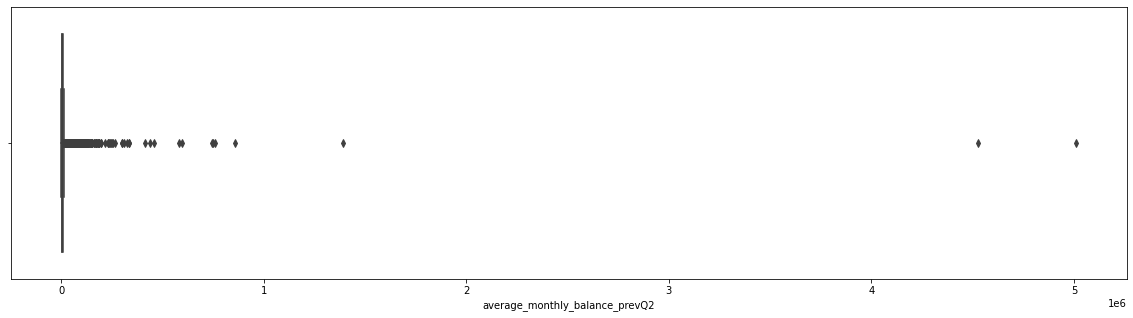

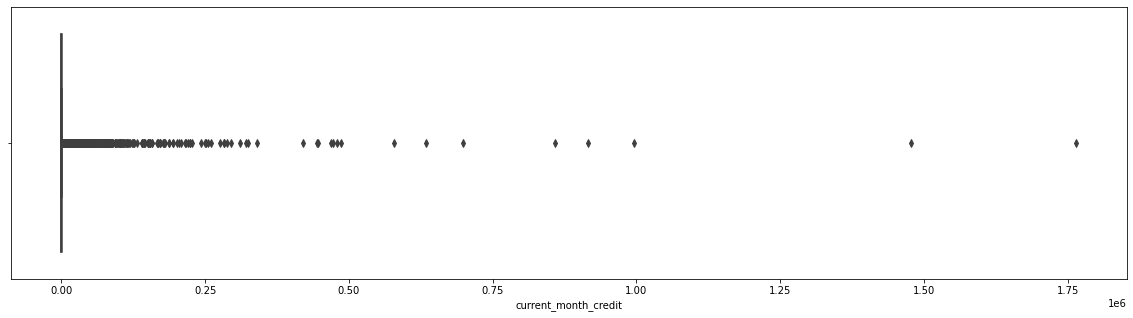

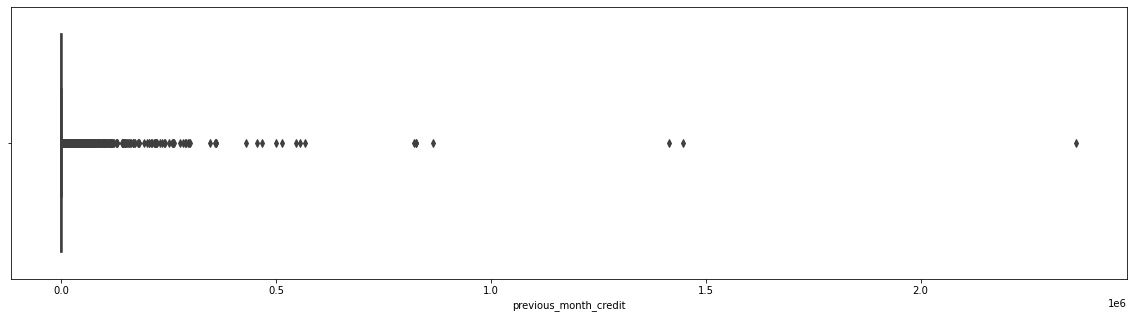

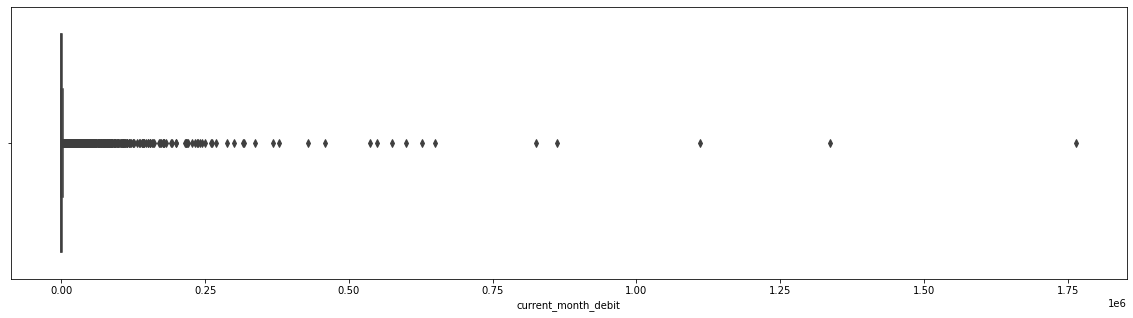

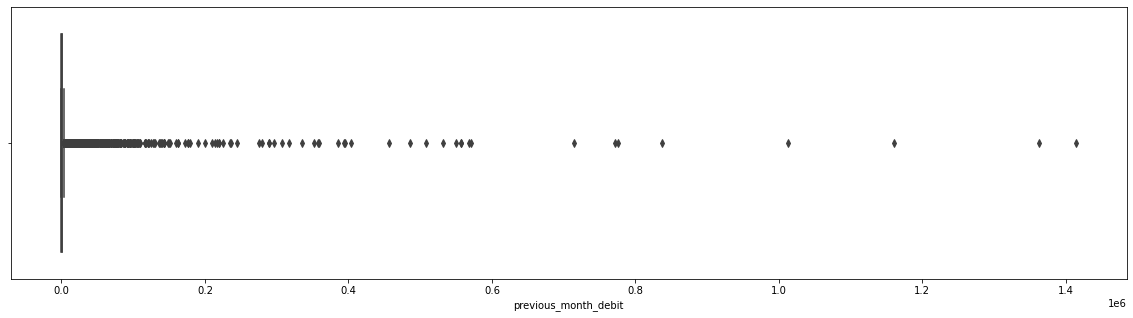

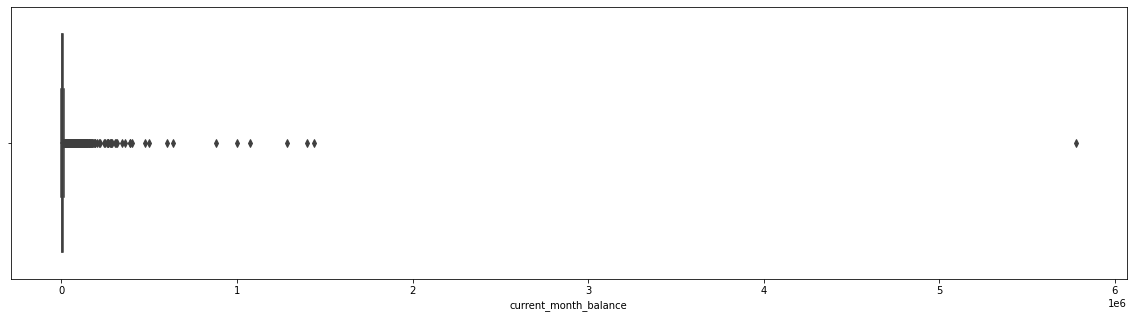

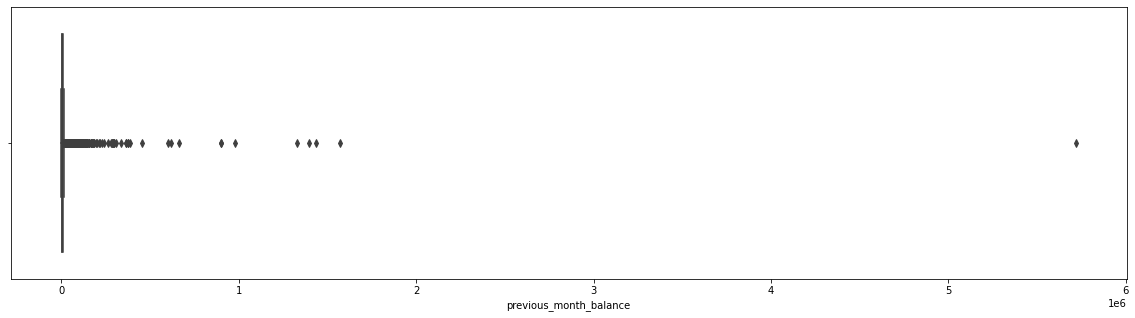

In [50]:
categorical=['churn','customer_id','gender','occupation','customer_nw_category']
for i in X_train.columns:
    if i not in categorical:
        outlier_detect(i,X_train)

* *Despite 'City' and 'Age' all continuous varibles contains outliers.*

## OUTLIER REMOVAL

In [51]:
#creating new dataframe for outlier removal in train,validation and test sets 
no_outliers=['customer_id','gender','occupation','customer_nw_category','age','city']
X_train_out=X_train.copy(deep=True)
X_test_out=X_test.copy(deep=True)

In [52]:
X_train_out.drop(columns=no_outliers,inplace=True)#dropping columns with no outliers in train dataset

In [53]:
X_test_out.drop(columns=no_outliers,inplace=True)#dropping columns with no outliers in test dataset

In [54]:
#using zscore for outlier removal in training dataset with threshold = 3 standard deviations
zscore=scipy.stats.zscore(X_train_out)
print(zscore)

[[-0.7609     -0.32699158  0.37670691 ... -0.13012912 -0.10441272
  -0.12484871]
 [ 0.13373394 -0.32699158 -0.0842105  ... -0.12915228 -0.13720223
  -0.00760766]
 [-0.81611666 -0.32699158 -0.54832872 ... -0.1141625   0.04455585
   0.05403135]
 ...
 [-0.23417031 -0.32699158  0.08543272 ... -0.07649923 -0.14075951
  -0.08140496]
 [-0.35577104 -0.32699158 -0.68062909 ... -0.06557362  7.45192858
   0.03252022]
 [ 0.43277247 -0.32699158 -0.97083634 ... -0.13013511 -0.09734174
  -0.09784308]]


In [55]:
#filtering out rows which has zscore less than 3 in training dataset
churn_train_out_data=X_train_out[(zscore<3).all(axis=1)]

In [56]:
#containing columns having no outliers in train
churn_categorical_train=X_train[no_outliers]

In [57]:
#recombining the dataset with no outliers columns of train dataset
churn_train_out_data=pd.concat([churn_train_out_data,churn_categorical_train],axis=1)

In [58]:
churn_train_out_data=churn_train_out_data.dropna() #removing the extra missing values 

In [59]:
print("Outliers removed from training set:",X_train.shape[0]-churn_train_out_data.shape[0])

Outliers removed from training set: 1385


In [60]:
#using zscore for outlier removal in test set
zscore_test=scipy.stats.zscore(X_test_out)
print(zscore_test)

[[-0.73776259 -0.34528552 -0.42065764 ... -0.19729154 -0.27699926
  -0.31275513]
 [ 0.38444423 -0.34528552 -0.71130292 ...  3.65347816 -0.07157547
   0.96006203]
 [-0.79072627 -0.34528552 -0.89122619 ... -0.12220284 -0.24069513
  -0.40549116]
 ...
 [-0.7103461   0.78642167 -0.88909692 ... -0.13925409  0.36310074
   0.46229937]
 [-0.06730477 -0.34528552 -0.78050417 ...  0.33720909 -0.26182977
  -0.07381169]
 [ 0.26418553  3.04983604 -0.30354782 ...  0.15137186  0.14988047
  -0.10430527]]


In [61]:
#filtering out rows which has zscore less than 3 in test dataset
churn_test_out_data=X_test_out[(zscore_test<3).all(axis=1)]

In [62]:
#containing columns having no outliers in test
churn_categorical_test=X_test[no_outliers]

In [63]:
#recombining the dataset with no outliers columns of test dataset
churn_test_out_data=pd.concat([churn_test_out_data,churn_categorical_test],axis=1)

In [64]:
churn_test_out_data=churn_test_out_data.dropna() #removing the extra missing values 

In [65]:
print("Outliers removed from test set:",X_test.shape[0]-churn_test_out_data.shape[0])

Outliers removed from test set: 716


In [66]:
#making the training data for model building
training_data=pd.concat([churn_train_out_data,y_train],axis=1)
training_data=training_data.dropna()

In [67]:
#making the test data for model building
testing_data=pd.concat([churn_test_out_data,y_test],axis=1)
testing_data=testing_data.dropna()

In [68]:
#saving both the dataset into csv
training_data.to_csv('churn_train.csv')
testing_data.to_csv('churn_test.csv')